## In this notebook we study the following single species coagulation reaction with sopantaneous creation and destruction:

\begin{equation}
    A \leftrightharpoons_{k_2}^{k_1} \emptyset    
\end{equation}

\begin{equation}
    A + A\rightarrow^{k_3} A    
\end{equation}

## Starting from Poisson initial conditions. 

### From the following paper: 
##### M. Harsh and P. Sollich, Accurate Dynamics from Self-Consistent Memory in Stochastic Chemical Reactions with Small Copy Numbers, J. Phys. A: Math. Theor. (2023).


In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

sys.path.append('../')
sys.path.append('../src')

from src import cheMASTER
from src.sbr import AAA,ABC

import matplotlib

#from importlib import reload
#reload(AAA)

## Setting up the reaction stoichiometry, rates and initial conditions

In [2]:
# Setting up the reactions and the parameters:

#Number of species in the reaction system
num_species     = 1 

#Number of interating reactions in the Hamiltonian
num_interaction = 1 

#This counts the total number of possible reactions in the system.
#We have 2N creation and destruction reactions and the rest interaction reactions
num_reactions   = 2*num_species + num_interaction 

# Rate constants for the reaction system: [k1 is Creation and k2 is Destruction]
k1 = np.array([1.]) #len must be equal to num_species
k2 = np.array([1.]) #len must be equal to num_species

# Interaction reactions:
k3 = np.array([1.]) #len must be equal to num_interactions    

#Defining the stoichiometry for the reactions
s_i,r_i = np.zeros([num_interaction,num_species]),np.zeros([num_interaction,num_species])

#Write this for all reactions in the interacting Hamiltonian corresponding to the reaction rate k3
s_i[0] = [1] 
r_i[0] = [2]

rxn_par = [k1,k2,k3]

#The initial mean concentration of the species
initial_values = 4./3.


In [20]:
plt.rcParams.update({'text.usetex':False,
                     'xtick.labelsize': 20,
                     'ytick.labelsize': 20,
                     'xtick.major.width':3,
                     'ytick.major.width':3,
                     'xtick.major.size':10,
                     'ytick.major.size':10,
                     'xtick.direction':'in',
                     'ytick.direction':'in',

'font.size': 30,
'figure.autolayout': True,
'figure.figsize': (10,5),
'axes.titlesize' : 20,
'axes.labelsize' : 20,
'lines.linewidth' : 3,
'lines.markersize' : 3,
'legend.fontsize': 13,
'mathtext.fontset': 'stix',
'axes.linewidth':3,
'font.family': 'Arial'})

### Gillespie:

In [18]:
gill1 = cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i)
cheMASTER.gillespie_avg(gill1,1,initial_values,0,2.,0.002,10000)

gill2 = cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i)
cheMASTER.gillespie_avg(gill2,1,initial_values,0,2.,0.002,10000)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 241.84it/s]


In [4]:
sys1 = cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i)
cheMASTER.gillespie_avg(sys1,100000,initial_values,0,2.,0.002,10000)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [02:51<00:00, 584.60it/s]


In [16]:
sys1.gill_stdev *= np.sqrt(100000)

### Master Equation via Euler steps:

In [12]:
sys_1 = cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i)
cheMASTER.initialize_dynamics(sys_1,initial_values,0,2.,0.002)
cheMASTER.runDynamics(sys_1,max_num=[20],method='Euler')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 3142.23it/s]


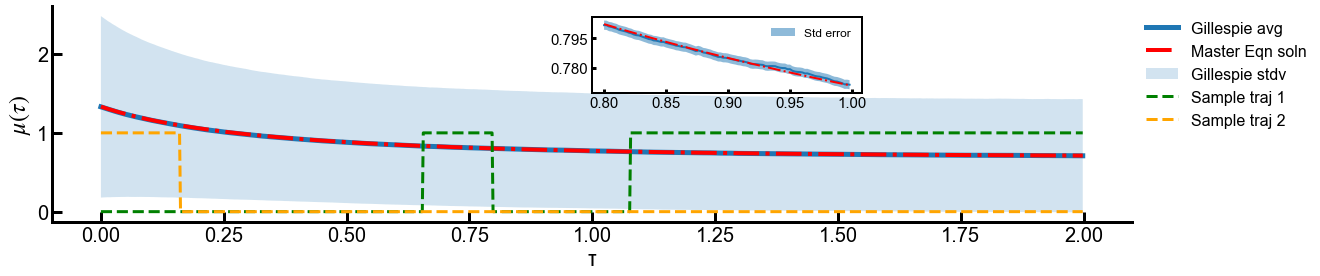

In [21]:
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_axes([0, 0, 1, 1])
ax1.plot(sys1.timeGrid,sys1.y[0],linewidth=5,label='Gillespie avg')
ax1.plot(sys_1.timeGrid,sys_1.y[0],linestyle='-.',linewidth=4,label='Master Eqn soln',c='red')
ax1.fill_between(sys1.timeGrid,sys1.y[0,:]-sys1.gill_stdev[0,:],sys1.y[0,:]+sys1.gill_stdev[0,:],alpha=0.2,label='Gillespie stdv')
ax1.plot(sys1.timeGrid,gill1.y[0],linewidth=3,linestyle='--',label='Sample traj 1',c='green')
ax1.plot(sys1.timeGrid,gill2.y[0],linewidth=3,linestyle='--',label ='Sample traj 2',c='orange')

ax1.set_xlabel(r'$\mathregular{\tau}$',fontsize=22)
ax1.set_ylabel(r'$\mu(\tau)$',fontsize=24)
ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1.))
ax1.legend(bbox_to_anchor=(1, 1), loc=0, frameon=False, fontsize=16)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2= fig.add_axes([0.5, 0.6, 0.25, 0.35])
ax2.plot(sys1.timeGrid[400:500],sys1.y[0,400:500],linewidth=2)
ax2.fill_between(sys1.timeGrid[400:500],sys1.y[0,400:500]-sys1.gill_stdev[0,400:500]/np.sqrt(100000),sys1.y[0,400:500]+sys1.gill_stdev[0,400:500]/np.sqrt(100000)\
                 ,alpha=0.5,label='Std error')
ax2.plot(sys_1.timeGrid[400:500],sys_1.y[0,400:500],linestyle='-.',linewidth=2,c='red')

ax2.tick_params(axis='both',which='major',length=4,width=3,labelsize=15)
ax2.legend(frameon=False, fontsize=12)
ax2.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.015))
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

### ME with Eigenvalues:

In [28]:
sysEV_1 = cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i)
cheMASTER.initialize_dynamics(sysEV_1,initial_values,0,2.,0.002)
cheMASTER.runDynamics(sysEV_1,max_num=[20],method='Eigenvalue',variance=True,selfCorrelator_tau='connected')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:04<00:00, 15.39it/s]


### The various diagrammatic approximations:

In [40]:
y_all,resp_all,time_grid_all = \
AAA.integrate_all_corr(k1,k2,k3,alpha=1.,init_time=0.,final_time=2.,dt=0.002,initial_values=initial_values)

In [37]:
y_mak,resp_mak,time_grid_mak = \
AAA.integrate_mak(k1,k2,k3,alpha=1.,init_time=0.,final_time=2.,dt=0.002,initial_values=initial_values)

In [41]:
y_all_R0,resp_all_R0,time_grid_all_R0 = \
AAA.integrate_all_alpha_0(k1,k2,k3,alpha=1.,init_time=0.,final_time=2.,dt=0.002,initial_values=initial_values)

In [42]:
y_R0_2,resp_R0_2,time_grid_R0_2 = \
AAA.integrate_alpha2_alpha_0(k1,k2,k3,alpha=1.,init_time=0.,final_time=2.,dt=0.002,initial_values=initial_values)

In [43]:
y_R_2,resp_R_2,time_grid_R_2 = \
AAA.integrate_alpha2_alpha_all(k1,k2,k3,alpha=1.,init_time=0.,final_time=2.,dt=0.002,initial_values=initial_values)

In [44]:
y_emre,time_grid_emre,eps_emre,var_emre = \
AAA.emre(k1,k2,k3,alpha=1.,init_time=0.,final_time=2.,dt=0.002,initial_values=initial_values)

#### Moment closure:

In [46]:
momentClosure_alpha1 = np.loadtxt("../data/momentClosure/AA_A/alpha_1.csv")

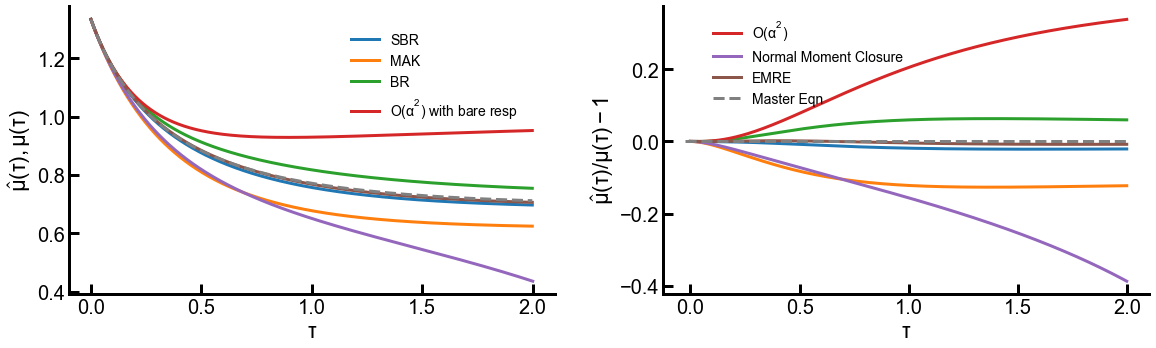

In [49]:
fig = plt.figure(figsize=(15,4))

ax1 = fig.add_axes([0, 0, 0.45, 1])

ax1.plot(time_grid_all,y_all,label = 'SBR')
ax1.plot(time_grid_mak,y_mak, label = 'MAK')
ax1.plot(time_grid_mak,y_all_R0,label = 'BR')
ax1.plot(time_grid_mak,y_R0_2, label = r'$\mathregular{O(\alpha^2)}$ with bare resp' )
#ax1.plot(time_grid_mak,y_R_2,label = r'$\mathregular{O(\alpha^2)}$ with dressed resp')
ax1.plot(momentClosure_alpha1[0],momentClosure_alpha1[1],label= '_Normal Moment Closure')
ax1.plot(time_grid_emre,y_emre+eps_emre,label='_EMRE')
ax1.plot(sysEV_1.timeGrid,sysEV_1.y[0],'--',label = '_Master Eqn soln',color='gray')
#ax1.fill_between(sysEV_1.timeGrid,sysEV_1.y[0,:]-sysEV_1.variance[0,:]**0.5,sysEV_1.y[0,:]+sysEV_1.variance[0,:]**0.5\
#                 ,alpha=0.2,label='Std from master eqn')

ax1.set_xlabel(r'$\mathregular{\tau}$',fontsize=22)
#ax1.set_ylabel('Avg. copy numbers')
ax1.set_ylabel(r'$\mathregular{\hat{\mu}(\tau),\mu(\tau)}$',fontsize=22)
ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.2))
ax1.legend(bbox_to_anchor=(0.95, 0.95), loc=1, frameon=False, fontsize=14)
#ax1.legend(loc=0, frameon=False, fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
#ax1.set_ylim([0.,2.])

ax2 = fig.add_axes([0.55, 0., 0.45, 1])

ax2.plot(time_grid_all,y_all/sysEV_1.y[0]-1,     label = '_Bubble resummation w/ dressed resp')
ax2.plot(time_grid_mak,y_mak/sysEV_1.y[0]-1,     label = '_Mass action kinetics')
ax2.plot(time_grid_mak,y_all_R0/sysEV_1.y[0]-1,  label = '_Bubble resummation w/ bare resp')
ax2.plot(time_grid_mak,y_R0_2/sysEV_1.y[0]-1,    label = r'$\mathregular{O(\alpha^2)}$')
#ax1.plot(time_grid_mak,y_R_2/sys_1.y[0]-1 ,label = r'$\mathregular{O(\alpha^2)}$ w/ dressed resp')
ax2.plot(time_grid_mak,momentClosure_alpha1[1,:-1]/sysEV_1.y[0]-1,label= 'Normal Moment Closure')
ax2.plot(time_grid_emre,(y_emre+eps_emre)/sysEV_1.y[0]-1,label='EMRE')
ax2.hlines(0,-0.025,time_grid_mak[-1],linestyles='dashed',colors='gray',label = 'Master Eqn')

ax2.set_xlabel(r'$\mathregular{\tau}$',fontsize=22)
#ax2.set_ylabel('Rel. dev. from Master Eqn')
ax2.set_ylabel(r'$\mathregular{\hat{\mu}(\tau)/\mu(\tau) - 1}$',fontsize=22)

ax2.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.2))
ax2.legend(bbox_to_anchor=(0.52, 1.), loc=1, frameon=False, fontsize=14)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)



### Change the rates:

In [50]:
alpha_range = [0.1,1.,10.,100.,1000.]
dt_range    = ([0.02,0.002,0.0002,0.00002,0.000002])
ftime_range = [20.,2.,0.2,0.02,0.002]

In [51]:
Y_ALL_ALPHA_0,RESP_ALL_ALPHA_0,TG_ALL_ALPHA_0 = [],[],[]

for i in range(len(alpha_range)):

    y,resp,time_grid = AAA.integrate_all_alpha_0(k1,k2,k3,alpha=alpha_range[i],init_time=0.,final_time=ftime_range[i],dt=dt_range[i],initial_values=initial_values)
    Y_ALL_ALPHA_0.append(y)
    RESP_ALL_ALPHA_0.append(resp)
    TG_ALL_ALPHA_0.append(time_grid)


In [52]:
Y_ALPHA2_ALPHA_0,RESP_ALPHA2_ALPHA_0,TG_ALPHA2_ALPHA_0 = [],[],[]

for i in range(len(alpha_range)):

    y,resp,time_grid = AAA.integrate_alpha2_alpha_0(k1,k2,k3,alpha=alpha_range[i],init_time=0.,final_time=ftime_range[i],dt=dt_range[i],initial_values=initial_values)
    Y_ALPHA2_ALPHA_0.append(y)
    RESP_ALPHA2_ALPHA_0.append(resp)
    TG_ALPHA2_ALPHA_0.append(time_grid)

In [53]:
Y_ALPHA2_ALL,RESP_ALPHA2_ALL,TG_ALPHA2_ALL = [],[],[]

for i in range(len(alpha_range)):

    y,resp,time_grid = AAA.integrate_alpha2_alpha_all(k1,k2,k3,alpha=alpha_range[i],init_time=0.,final_time=ftime_range[i],dt=dt_range[i],initial_values=initial_values)
    Y_ALPHA2_ALL.append(y)
    RESP_ALPHA2_ALL.append(resp)
    TG_ALPHA2_ALL.append(time_grid)

In [54]:
Y_EMRE,VAR_EMRE,TG_EMRE,EPS_EMRE = [],[],[],[]

for i in range(len(alpha_range)):
    #y_emre,time_grid_emre,eps_emre,var_emre = emre(alpha=1.,init_time=0.,final_time=2.,dt=0.02,initial_values=initial_values)
    y,time_grid,eps,var = AAA.emre(k1,k2,k3,alpha=alpha_range[i],init_time=0.,final_time=ftime_range[i],dt=dt_range[i],initial_values=initial_values)
    Y_EMRE.append(y+eps)
    VAR_EMRE.append(var)
    TG_EMRE.append(time_grid)



In [55]:
Y_MAK,RESP_MAK,TG_MAK = [],[],[]

for i in range(len(alpha_range)):

    y,resp,time_grid = AAA.integrate_mak(k1,k2,k3,alpha=alpha_range[i],init_time=0.,final_time=ftime_range[i],dt=dt_range[i],initial_values=initial_values)
    Y_MAK.append(y)
    RESP_MAK.append(resp)
    TG_MAK.append(time_grid)



In [62]:
Y_ALL,RESP_ALL,TG_ALL = [],[],[]

for i in range(len(alpha_range)):

    y,resp,time_grid = AAA.integrate_all_corr(k1,k2,k3,alpha=alpha_range[i],init_time=0.,final_time=ftime_range[i],dt=dt_range[i],initial_values=initial_values)
    Y_ALL.append(y)
    RESP_ALL.append(resp)
    TG_ALL.append(time_grid)


In [57]:
SYSEV1 = []
for i in range(len(alpha_range)):
    rxn_par[2][0] = alpha_range[i]
    SYSEV1.append(cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    cheMASTER.initialize_dynamics(SYSEV1[i],initial_values,0,ftime_range[i],dt_range[i])
    cheMASTER.runDynamics(SYSEV1[i],max_num=[20],method='Eigenvalue')
rxn_par[2] = k3

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 14984.15it/s]


In [58]:
SYS1 = []
for i in range(len(alpha_range)):
    rxn_par[2][0] = alpha_range[i]
    SYS1.append(cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    cheMASTER.initialize_dynamics(SYS1[i],initial_values,0,ftime_range[i],dt_range[i])
    cheMASTER.runDynamics(SYS1[i],max_num=[20],method='Eigenvalue')
rxn_par[2] = k3

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 16142.92it/s]


In [64]:
MomentClosure = []
for i in range(len(alpha_range)):
        MomentClosure.append(np.loadtxt("../data/momentClosure/AA_A_paper/alpha_"+str(i+1)+".csv"))

In [65]:
## Make the sum of relative deviation along the trajectory
Y_ALL_rel          = np.zeros(len(alpha_range))
Y_ALL_ALPHA_0_rel  = np.zeros(len(alpha_range))
Y_MAK_rel          = np.zeros(len(alpha_range))
Y_ALPHA2_ALPHA_0_rel   = np.zeros(len(alpha_range))
Y_ALPHA2_ALL_rel       = np.zeros(len(alpha_range))
momentClosure_rel      = np.zeros(len(alpha_range))
Y_EMRE_rel          = np.zeros(len(alpha_range))

for i in range(len(alpha_range)):
    momentClosure_rel[i]  = np.mean(np.abs((MomentClosure[i][1,1:]-SYS1[i].y[0,:1000])/SYS1[i].y[0,:1000]),axis=0,keepdims=False)
    Y_ALL_rel[i]          = np.mean(np.abs((Y_ALL[i]-SYS1[i].y[0])/SYS1[i].y[0]),axis=0,keepdims=False)
    Y_ALL_ALPHA_0_rel[i]  = np.mean(np.abs((Y_ALL_ALPHA_0[i]-SYS1[i].y[0])/SYS1[i].y[0]),axis=0,keepdims=False)                          
    Y_MAK_rel[i]          = np.mean(np.abs((Y_MAK[i]-SYS1[i].y[0])/SYS1[i].y[0]),axis=0,keepdims=False)
    Y_ALPHA2_ALL_rel[i]   = np.mean(np.abs((Y_ALPHA2_ALL[i]-SYS1[i].y[0])/SYS1[i].y[0]),axis=0,keepdims=False)                          
    Y_ALPHA2_ALPHA_0_rel[i]  = np.mean(np.abs((Y_ALPHA2_ALPHA_0[i]-SYS1[i].y[0])/SYS1[i].y[0]),axis=0,keepdims=False)
    Y_EMRE_rel[i]  = np.mean(np.abs((Y_EMRE[i]-SYS1[i].y[0])/SYS1[i].y[0]),axis=0,keepdims=False)

/usr/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/usr/lib/python3.11/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


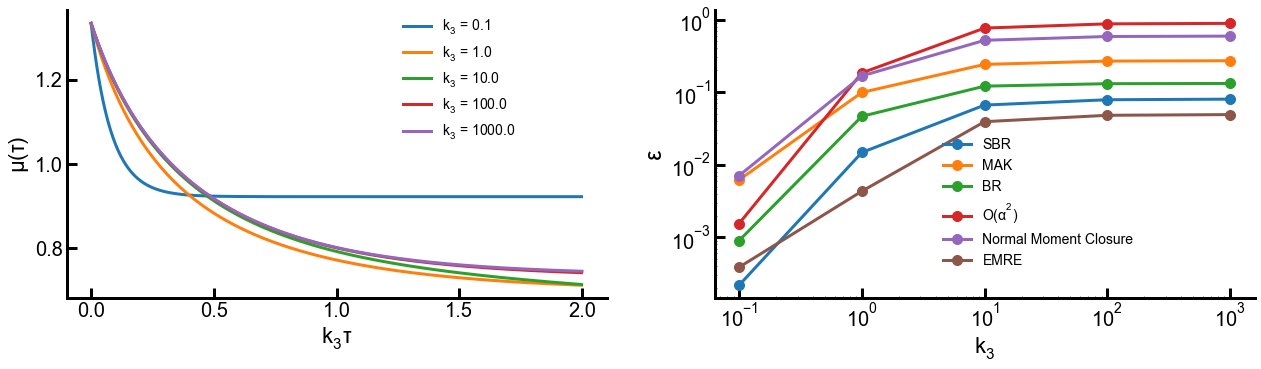

In [66]:
fig = plt.figure(figsize=(15,4))

ax1= fig.add_axes([0.,0, 0.5, 1])

#ax2.tick_params(axis='both',which='major',length=4,width=3,labelsize=15)
#ax2.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.015))
#for axis in ['top','bottom','left','right']:
#    ax2.spines[axis].set_linewidth(2)

for i in range(len(alpha_range)):
    #ax1.plot(np.arange(len(SYSEV1[i].y[0])),SYSEV1[i].y[0])
    ax1.plot(alpha_range[i]*SYSEV1[i].timeGrid,SYSEV1[i].y[0],label=r'$\mathregular{k_3}$ = ' + str(alpha_range[i]))
    
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.set_xlabel(r'$\mathregular{k_3 \tau}$',fontsize=22)
ax1.set_ylabel(r'$\mathregular{\mu(\tau)}$',fontsize=22)
ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.2))
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.5))

#for i in range(len(alpha_range)):
#    ax1.hlines(SYS1[i].y[0,fi[i]],0.7*fi[i],min(1.3*fi[i],1000),linestyles='dotted',color='gray')

#for i in range(len(alpha_range)):
#    if i == 0:
#        ax1.scatter(alpha_range[i]*SYSEV1[i].timeGrid[fi[i]],SYSEV1[i].y[0,fi[i]],marker='o',color='gray',s=200,label='Trajectory cut-off',alpha=0.5)
#    else:
#        ax1.scatter(alpha_range[i]*SYSEV1[i].timeGrid[fi[i]],SYSEV1[i].y[0,fi[i]],marker='o',color='gray',s=200,alpha=0.5)

ax1.legend(bbox_to_anchor=(0.6, 0.5), loc=0, frameon=False, fontsize=14)


ax2= fig.add_axes([0.60,0, 0.5, 1])

#ax2.tick_params(axis='both',which='major',length=4,width=3,labelsize=15)
#ax2.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.015))
#for axis in ['top','bottom','left','right']:
#    ax2.spines[axis].set_linewidth(2)

ax2.plot(alpha_range,Y_ALL_rel,'o-' ,    label = 'SBR',markersize=10)
ax2.plot(alpha_range,Y_MAK_rel,'o-',          label = 'MAK',markersize=10)
ax2.plot(alpha_range,Y_ALL_ALPHA_0_rel,'o-',  label = 'BR',markersize=10)
ax2.plot(alpha_range,Y_ALPHA2_ALPHA_0_rel,'o-',  label = r'$\mathregular{O(\alpha^2)}$',markersize=10)
#ax2.plot(alpha_range,Y_ALPHA2_ALL_rel ,'o-',     label = r'$\mathregular{O(\alpha^2)}$ w/ dressed resp',markersize=10)
ax2.plot(alpha_range,momentClosure_rel,'o-',     label= 'Normal Moment Closure',markersize=10)
ax2.plot(alpha_range,Y_EMRE_rel,'o-',     label= 'EMRE',markersize=10)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax2.set_xlabel(r'$\mathregular{k_3}$',fontsize=22)
#ax2.set_ylabel(r'$\mathregular{\frac{1}{N}\sum_\tau |\hat{\mu}(\tau)/\mu(\tau) - 1|}$',fontsize=22)
ax2.set_ylabel(r'$\mathregular{\epsilon}$',fontsize=24)


ax2.legend(bbox_to_anchor=(0.4, 0.6), loc=0, frameon=False, fontsize=14)

## Response from ME:

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 42.07it/s]


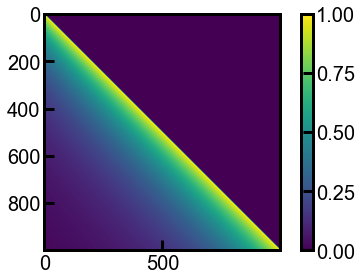

In [71]:
sys_res = cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i)
cheMASTER.initialize_dynamics(sys_res,initial_values,0,2.,0.002)
cheMASTER.runDynamics(sys_res,max_num=[20],method='Euler',measureResponse='finite',measureResponse_par=[1.1,1])

plt.figure()
plt.imshow(sys_res.Response[0])
plt.colorbar()

In [79]:
# In the other direction, that is as a function of $\tau'$:

respME_2  = np.copy(sys_res.Response[0]) 
respALL_2 = np.copy(resp_all)
respMAK_2 = np.copy(resp_mak)
#respLNA_2 = np.copy(emre.resp[0,0])

for j in range(len(time_grid_all)):
    for k in range(len(time_grid_all)-j):
        respME_2[k,j] = respME_2[k+j,j]
        respALL_2[k,j] = respALL_2[k+j,j]
        respMAK_2[k,j] = respMAK_2[k+j,j]
        #respLNA_2[k,j] = respLNA_2[k+j,j]
        

In [80]:
time_resp = np.array([200,400,600,800])

[[Text(0, -0.2, ''),
  Text(0, 0.0, ''),
  Text(0, 0.2, ''),
  Text(0, 0.4000000000000001, ''),
  Text(0, 0.6000000000000001, ''),
  Text(0, 0.8, ''),
  Text(0, 1.0000000000000002, ''),
  Text(0, 1.2000000000000002, '')]]

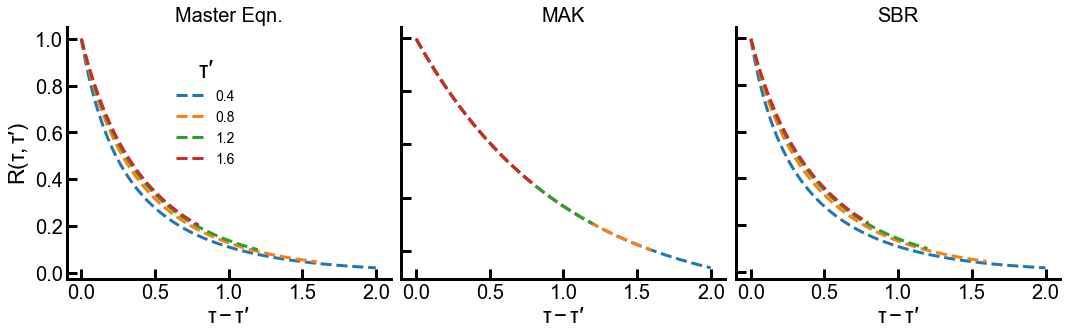

In [81]:
fig = plt.figure(figsize=(15,3.5))
ax1 = fig.add_axes([0, 0, 0.3, 1])

tau = np.array([0,200,400,600,800])

for j in range(len(time_resp)):    
    plt.plot(time_grid_all[1:len(time_grid_all)-tau[j]],respME_2[1:len(time_grid_all)-tau[j],tau[j]],'--')

ax1.set_xlabel(r'$\mathregular{\tau-\tau\prime}$',fontsize=22)
ax1.set_ylabel(r'$\mathregular{R(\tau,\tau\prime)}$',fontsize=22)
#ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.2))
ax1.legend(np.multiply(time_resp,0.002),title = r'$\mathregular{\tau\prime}$', bbox_to_anchor=(0.3, 0.4), loc=0, frameon=False, fontsize=14,title_fontsize=24)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title('Master Eqn.')

ax2 = fig.add_axes([0.31, 0, 0.3, 1])

#for i in range(len(dt_range)):
#ax2.plot(time_grid_all[1:],respMAK[time_resp,1:].T,'--')
for j in range(len(time_resp)):    
    plt.plot(time_grid_all[1:len(time_grid_all)-tau[j]],respMAK_2[1:len(time_grid_all)-tau[j],tau[j]],'--')

ax2.set_xlabel(r'$\mathregular{\tau-\tau\prime}$',fontsize=22)
#ax2.set_ylabel(r'$\mathregular{R(\tau,\tau^{\prime})}$')
#ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.2))
#ax2.legend(np.multiply(time_resp,0.002),title = r'$\mathregular{\tau}$', bbox_to_anchor=(0.25, 0.6), loc=0, frameon=False, fontsize=14)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('MAK')
ax2.set(yticklabels=[])

ax3 = fig.add_axes([0.62, 0, 0.3, 1])

#for i in range(len(dt_range)):
#ax3.plot(time_grid_all[1:],respALL[time_resp,1:].T,'--')
for j in range(len(time_resp)):    
    plt.plot(time_grid_all[1:len(time_grid_all)-tau[j]],respALL_2[1:len(time_grid_all)-tau[j],tau[j]],'--')


ax3.set_xlabel(r'$\mathregular{\tau-\tau\prime}$',fontsize=22)
#ax2.set_ylabel(r'$\mathregular{R(\tau,\tau^{\prime})}$')
#ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.2))
#ax2.legend(np.multiply(time_resp,0.002),title = r'$\mathregular{\tau}$', bbox_to_anchor=(0.25, 0.6), loc=0, frameon=False, fontsize=14)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_title('SBR')
ax3.set(yticklabels=[])


In [87]:
cOL = plt.rcParams['axes.prop_cycle'].by_key()['color']

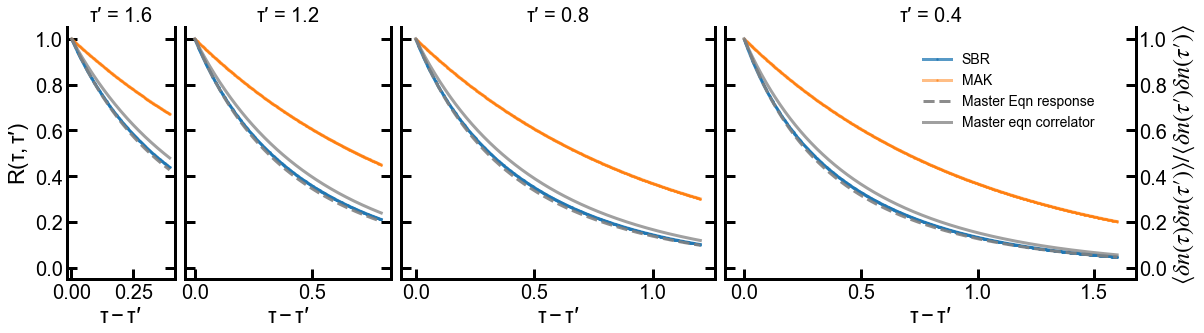

In [90]:
i=0
ax2 = ax1.twinx()

fig = plt.figure(figsize=(15,3.5))
ax1 = fig.add_axes([0, 0., 0.1, 1])
ax2 = fig.add_axes([0.11, 0., 0.19, 1])
ax3 = fig.add_axes([0.31, 0., 0.29, 1])
ax4 = fig.add_axes([0.61, 0., 0.38, 1])
z=0
#axis= [ax1,ax2,ax3,ax4]
axis= [z,ax4,ax3,ax2,ax1]
z=0
#Z = z.twinx()
Ax4 = ax4.twinx()
Ax3 = ax3.twinx()
Ax2 = ax2.twinx()
Ax1 = ax1.twinx()

Axis = [z,Ax4,Ax3,Ax2,Ax1] #twin axis for second y axis with the same x-axis

#for j in range(len(time_resp)):
#    axis[j].plot(sysEV_1.timeGrid[corr_tau_ALL[i,:,tau[j]]>0],corr_tau_ALL[i,corr_tau_ALL[i,:,tau[j]]>0,tau[j]]/corr_tau_ALL[i,0,tau[j]],'--')

for j in range(1,len(tau)):
    
    axis[j].plot(time_grid_all[1:len(time_grid_all)-tau[j]],respALL_2[1:len(time_grid_all)-tau[j],tau[j]],'.-',alpha=0.75)
    axis[j].plot(time_grid_all[1:len(time_grid_all)-tau[j]],respMAK_2[1:len(time_grid_all)-tau[j],tau[j]],'.-',alpha=0.5)
    
    #axis[j].plot(time_grid_all[1:len(time_grid_all)-tau[j]],respLNA_2[1:len(time_grid_all)-tau[j],tau[j]],'.-',alpha=0.5,color='green')
    
    axis[j].plot(time_grid_all[1:len(time_grid_all)-tau[j]],respME_2[1:len(time_grid_all)-tau[j],tau[j]],'--',alpha=0.9,color='gray')
    axis[j].plot(sysEV_1.timeGrid[sysEV_1.correlator_tau[i,:,tau[j]]>0],sysEV_1.correlator_tau[i,sysEV_1.correlator_tau[i,:,tau[j]]>0,tau[j]]/sysEV_1.correlator_tau[i,0,tau[j]],'-',alpha=0.75,color='gray')    
    
    #axis[j].plot(time_grid_all[1:len(time_grid_all)-tau[j]],respLNA_2[1:len(time_grid_all)-tau[j],tau[j]],'.-',alpha=0.5)
    
    axis[j].set_title(r'$\mathregular{\tau\prime}$ = '+str(tau[j]*0.002))
    #Axis[j] =axis[j].twinx()
    
    axis[j].spines['right'].set_visible(False)
    axis[j].spines['top'].set_visible(False)
    axis[j].set_xlabel(r'$\mathregular{\tau-\tau\prime}$',fontsize=22)
    axis[j].set_ylim((-0.05,1.05))
    
    Axis[j].spines['left'].set_visible(False)
    Axis[j].spines['bottom'].set_visible(False)
    #Axis[j].spines['right'].set_color(cOL[4])
    Axis[j].spines['top'].set_visible(False)
    #axis[j].set_xlabel(r'$\mathregular{\tau}$',fontsize=22)
    Axis[j].set_ylim((-0.05,1.05))
    

ax1.set_ylabel(r'$\mathregular{R(\tau,\tau\prime)}$',fontsize=22)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])

Ax1.set(yticklabels=[])
Ax2.set(yticklabels=[])
Ax3.set(yticklabels=[])
Ax4.set_ylabel(r'$\langle \delta n(\tau) \delta n(\tau\prime) \rangle / \langle \delta n(\tau\prime) \delta n(\tau\prime) \rangle $',fontsize=24)

#ax4.legend(['Master Eqn response','MAK','Bubble resummed','Master eqn correlator'],bbox_to_anchor=(0.45, 0.95), loc=0, frameon=False, fontsize=14)
ax4.legend(['SBR','MAK','Master Eqn response','Master eqn correlator'],bbox_to_anchor=(0.45, 0.95), loc=0, frameon=False, fontsize=14)


In [95]:
corr_tau_ALL = np.zeros([1,len(sysEV_1.timeGrid),len(sysEV_1.timeGrid)])
i=0
for j in range(len(sysEV_1.timeGrid)):
    for k in range(len(sysEV_1.timeGrid)-j):
        corr_tau_ALL[i,k,j] = resp_all[k+j,j]*y_all[j]
        
corr_tau_MAK = np.zeros([1,len(sysEV_1.timeGrid),len(sysEV_1.timeGrid)])
i=0
for j in range(len(sysEV_1.timeGrid)):
    for k in range(len(sysEV_1.timeGrid)-j):
        corr_tau_MAK[i,k,j] = resp_mak[k+j,j]*y_mak[j]

Text(0.5, 0, '$\\mathregular{\\tau}$')

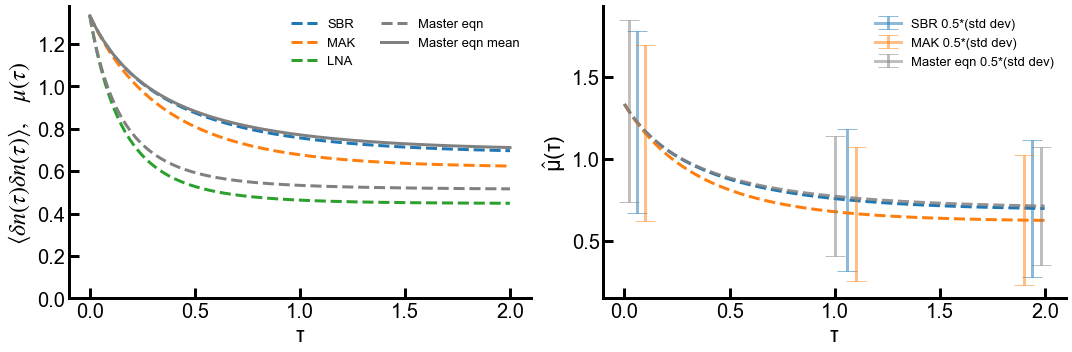

In [99]:
tau = np.array([0,200,400,600,800])
i=0
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
    
ax2 = plt.subplot(121)
#Ax2 = ax1.twinx()
for i in range(num_species):
    
    ax2.plot(sysEV_1.timeGrid,corr_tau_ALL[0,0,:],'--',c=cOL[0])
    ax2.plot(sysEV_1.timeGrid,corr_tau_MAK[0,0,:],'--',c=cOL[1])
    ax2.plot(time_grid_emre,var_emre,'--',c=cOL[2])
    #ax2.plot(sys_SBR.timeGrid,sys_SBR.y[0]+np.diag(sys_SBR.corr[0]),'.-',c=cOL[3])
    ax2.plot(sysEV_1.timeGrid,sysEV_1.variance[i,:],'--',c='gray')
    ax2.plot(sysEV_1.timeGrid,sysEV_1.y[i,:],c='gray')
    #ax2.plot(time_grid_emre,var_emre-eps_emre**2,c=cOL[4])


    #plt.plot(sysEV_1.timeGrid[:],sysEV_1.correlator_tau[0,0,:],'.')
    plt.xlabel(r"$\mathregular{\tau}$",fontsize=22)
    ax2.set_ylabel(r"$\langle \delta n(\tau) \delta n(\tau) \rangle,\hspace{1} \mu(\tau)$",fontsize=24)
    #plt.ylim((np.min(sysx.correlator_tau[i,sysx.correlator_tau[i,:,:]>0])),np.max(sysx.correlator_tau[i,:,:]))
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.legend(['SBR','MAK','LNA','Master eqn','Master eqn mean'],frameon=False,ncol=2)
    ax2.set_ylim((0.))
    

ax1 = plt.subplot(122)

plt.plot(sysEV_1.timeGrid,y_all,'--',label='_a',c=cOL[0])
plt.errorbar(sysEV_1.timeGrid[-30],y_all[-30],0.5*corr_tau_ALL[0,0,-30]**0.5,barsabove=False,capsize=10,alpha=0.5,c=cOL[0],label='SBR 0.5*(std dev)')
plt.errorbar(sysEV_1.timeGrid[30],y_all[30],0.5*corr_tau_ALL[0,0,30]**0.5,barsabove=False,capsize=10,alpha=0.5,c=cOL[0])
plt.errorbar(sysEV_1.timeGrid[530],y_all[530],0.5*corr_tau_ALL[0,0,530]**0.5,barsabove=False,capsize=10,alpha=0.5,c=cOL[0])

plt.plot(sysEV_1.timeGrid,y_mak,'--',label='_b',c=cOL[1])
plt.errorbar(sysEV_1.timeGrid[-50],y_mak[-50],0.5*corr_tau_MAK[0,0,-50]**0.5,barsabove=False,capsize=10,alpha=0.5,c=cOL[1],label='MAK 0.5*(std dev)')
plt.errorbar(sysEV_1.timeGrid[50],y_mak[50],0.5*corr_tau_MAK[0,0,50]**0.5,barsabove=False,capsize=10,alpha=0.5,c=cOL[1])
plt.errorbar(sysEV_1.timeGrid[550],y_mak[550],0.5*corr_tau_MAK[0,0,550]**0.5,barsabove=False,capsize=10,alpha=0.5,c=cOL[1])

plt.plot(sysEV_1.timeGrid,sysEV_1.y[0],'--',label='_c',c='gray',alpha=0.85)
plt.errorbar(sysEV_1.timeGrid[-10],sysEV_1.y[0,-10],0.5*sysEV_1.variance[0,-10]**0.5,barsabove=False,capsize=10,alpha=0.5,c='gray',label='Master eqn 0.5*(std dev)')
plt.errorbar(sysEV_1.timeGrid[10],sysEV_1.y[0,10],0.5*sysEV_1.variance[0,10]**0.5,barsabove=False,capsize=10,alpha=0.5,c='gray')
plt.errorbar(sysEV_1.timeGrid[500],sysEV_1.y[0,500],0.5*sysEV_1.variance[0,500]**0.5,barsabove=False,capsize=10,alpha=0.5,c='gray')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend(frameon=False)
ax1.set_ylabel(r'$\mathregular{\hat{\mu}(\tau)}$',fontsize=22)
ax1.set_xlabel(r'$\mathregular{\tau}$',fontsize=22)
